In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
air_passengers = pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)
air_passengers.tail()
len(air_passengers)

144

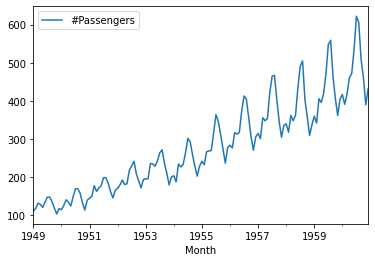

In [2]:
air_passengers.plot()

In [3]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
auto = auto_arima(air_passengers['#Passengers'],trace=True,suppress_warnings=True)
auto.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Tue, 19 Jan 2021   AIC                           1365.825
Time:                        19:43:38   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.781      0.000      -0.787      -0.329
ar.L2          0.4934      0.113      4.373      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.969      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9070      0.094      9.656      0.000       0.723       1.091
ma.L2         -0.5589      0.145     -3.864      0.000      -0.842      -0.275
ma.L3         -0.7384      0.109     -6.776      0.000      -0.952      -0.525
sigma2       724.2188     85.623      8.458      0.000     556.401     892.037
===================================================================================
Ljung-Box (Q):                      256.02   Jarque-Bera (JB):                14.59
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
from statsmodels.tsa.arima_model import ARIMA

In [5]:
train = air_passengers['#Passengers'].iloc[:-30]
test = air_passengers['#Passengers'].iloc[-30:]
print(train.shape,test.shape)

(114,) (30,)


In [10]:
model = ARIMA(train,order=(4,1,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  113
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -504.525
Method:                       css-mle   S.D. of innovations             20.562
Date:                Tue, 19 Jan 2021   AIC                           1025.050
Time:                        19:51:35   BIC                           1046.870
Sample:                    02-01-1949   HQIC                          1033.904
                         - 06-01-1958                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5050      0.132     18.990      0.000       2.246       2.764
ar.L1.D.#Passengers     0.2737      0.141      1.942      0.052      -0.003       0.550
ar.L2.D.#Passengers     0.2797      0.165      1.697      0.090      -0.043       0.603
ar.L3.D.#Passengers    -0.1027      0.139     -0.739      0.460      -0.375       0.170
ar.L4.D.#Passengers    -0.2683      0.106     -2.540      0.011      -0.475      -0.061
ma.L1.D.#Passengers    -0.1716      0.141     -1.220      0.223      -0.447       0.104
ma.L2.D.#Passengers    -0.8284      0.138     -5.993      0.000      -1.099      -0.557
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0246           -0.7245j            1.2549           -0.0980
AR.2            1.0246           +0.7245j            1.2549            0.0980
AR.3           -1.2160           -0.9424j            1.5384           -0.3951
AR.4           -1.2160           +0.9424j            1.5384            0.3951
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.2072           +0.0000j            1.2072            0.5000
-----------------------------------------------------------------------------
"""

1958-07-01    435.111070
1958-08-01    422.560297
1958-09-01    409.785835
1958-10-01    385.498130
1958-11-01    378.584492
1958-12-01    376.626484
1959-01-01    382.126463
1959-02-01    392.358652
1959-03-01    400.801652
1959-04-01    407.982983
1959-05-01    411.831644
1959-06-01    413.329320
1959-07-01    413.861001
1959-08-01    414.151483
1959-09-01    415.241349
1959-10-01    417.212525
1959-11-01    419.932449
1959-12-01    423.086429
1960-01-01    426.263653
1960-02-01    429.255292
1960-03-01    431.957173
1960-04-01    434.408994
1960-05-01    436.724150
1960-06-01    439.011510
1960-07-01    441.356459
1960-08-01    443.790522
1960-09-01    446.304605
1960-10-01    448.867059
1960-11-01    451.440530
1960-12-01    453.998419
Freq: MS, dtype: float64


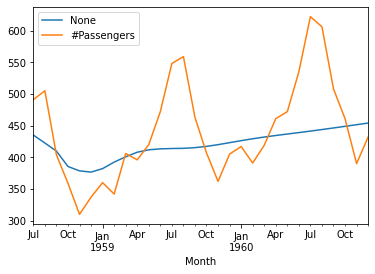

In [11]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start,end=end,typ='levels')
print(pred)
pred.plot(legend=True)
test.plot(legend=True)

In [12]:
test.mean()

442.0

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test))
print(rmse)

70.40748570060462


In [14]:
model2 = ARIMA(air_passengers['#Passengers'],order=(4,1,2))
model2 = model2.fit()

In [71]:
future_dates = pd.date_range(start='1960-01-12',end='1960-01-22',freq='D')
pred = model2.predict(start=144,end=154,typ='levels')
print(pred)

1961-01-01    480.646629
1961-02-01    484.776776
1961-03-01    511.932609
1961-04-01    500.141049
1961-05-01    497.767207
1961-06-01    487.284861
1961-07-01    483.090728
1961-08-01    483.831441
1961-09-01    487.983299
1961-10-01    495.037339
1961-11-01    501.351003
Freq: MS, dtype: float64


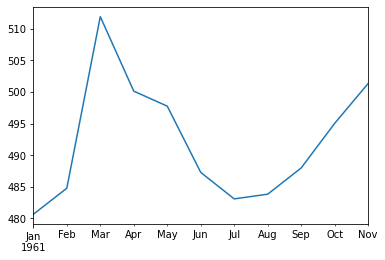

In [66]:
pred.plot()